In [2]:
import numpy as np
import math

In [3]:
def ricker(freq, length, dt, peak_time):
    """Return a Ricker wavelet with the specified central frequency.
    Args:
        freq: A float specifying the central frequency
        length: An int specifying the number of time samples
        dt: A float specifying the time sample spacing
        peak_time: A float specifying the time (in secs) of the peak amplitude
        dtype: The PyTorch datatype to use. Optional, defaults to default.
    """
    t = np.arange(0,length)*dt - peak_time
    y = (1-2*math.pi**2 * freq**2 * t**2) * np.exp(-math.pi**2 * freq**2 * t**2)
    return y

In [4]:
dt = 0.001                     # delta
timeLen = 1                    # in second
nt = int(timeLen/dt)           # sample points
peak_freq = 10                  # in Hz
peak_sorce_time = 1/peak_freq  #
source_amplitudes = ricker(peak_freq, nt, dt, peak_sorce_time)
src = source_amplitudes

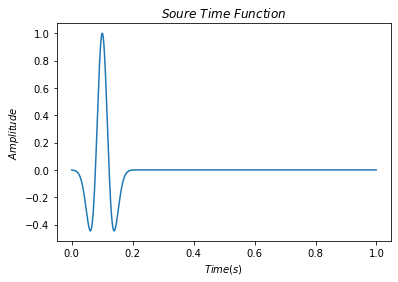

In [5]:
# plot source time function
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(np.arange(0,nt)*dt,source_amplitudes)
plt.xlabel('$Time(s)$')
plt.ylabel('$Amplitude$')
plt.title('$Soure\ Time\ Function$')
#plt.grid(ls='--')
plt.show()

198


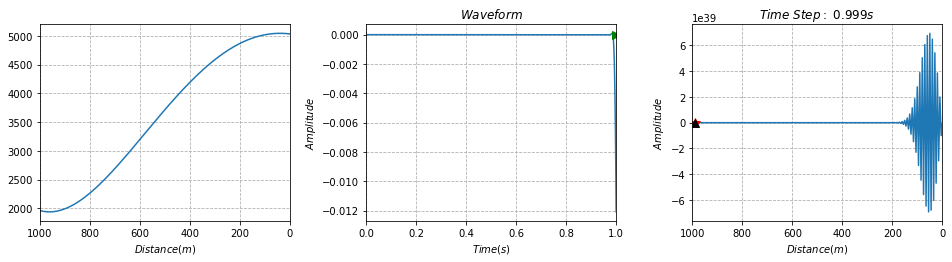

In [11]:
# 1D Wave Propagation (Finite Difference Solution)

nx   = 200         # number of grid points in x-direction
dx   = 5          # grid point distance in x-direction
c0   = 333.         # wave speed in medium (m/s)
isrc = 198          # source location in grid in x-direction
ir   = 198          # receiver location in grid in x-direction

# Initialize empty pressure
# -------------------------
p    = np.zeros(nx) # p at time n (now)
pold = np.zeros(nx) # p at time n-1 (past)
pnew = np.zeros(nx) # p at time n+1 (present)
d2px = np.zeros(nx) # 2nd space derivative of p
dc1px = np.zeros(nx)
p1px = np.zeros(nx)

# Initialize empty seismogram
seis = np.zeros(nt)

# Initialize model (assume homogeneous model)
# -------------------------------------------
c    = np.concatenate((np.ones(60)*5000, np.ones(50)*4000, np.ones(40)*3000, np.ones(50)*2000))
#c = np.linspace(500, 400, nx)
vel = c
c = sm_vel_value
def plot_p(it, nt, dt, c0, seis, src, ir, nx, dx, ax, plottype='position'):
    if plottype == 'position':
        #ax.plot([0, nx*dx], [350, 350], ls='-')
        #ax.plot(src*dx, 350, 'r*', markersize=11)
        #ax.plot(ir*dx, 350, 'k^', markersize=8)
        #ax.plot(src*dx-np.arange(0,nt)[it]*dt*c0, 350, 'g>', markersize=8)
        pass
        
    if plottype == 'waveform':
        time = np.linspace(0 * dt, nt * dt, nt)
        ax.plot(time, seis)
        ax.plot(np.arange(0,nt)[it]*dt, 0, 'g>', markersize=8)
    
bc = 'o'
sn = -1
for it in range(nt):
    for i in range(0+1, nx-1):
        d2px[i] = (p[i + 1] - 2 * p[i] + p[i - 1]) / dx ** 2
        #dc1px[i] = 2 * c[i] * (c[i+1] - c[i]) / dx
        dc1px[i] = c[i] * (c[i+1] - c[i-1]) / dx
        #p1px[i] = (p[i+1] - p[i]) / dx
        p1px[i] = 0.5 * (p[i+1] - p[i-1]) / dx
    
    # Time Extrapolation
    # ------------------
    pnew = 2 * p - pold + c ** 2 * dt ** 2 * d2px + dc1px * p1px * dt **2
    
    # Add Source Term at isrc
    #pnew[isrc] = pnew[isrc] + 2 * c[isrc] * src[it] / (dx) * dt ** 2
    pnew[isrc] = pnew[isrc] + src[it] / (dx) * dt ** 2
    
    if it == range(nt)[sn]:
        print(isrc)
        #print(pnew)
    
    if bc == 'd': # Dirichlet
        pnew[0] = 0
        pnew[-1] = 0
    if bc == 'o': # open
        pnew[-1] = pnew[-2] - 1/c[-1] * (pnew[-2] - p[-2])*dx/dt
        pnew[0] = 0
    # Remap Time Levels
    pold, p = p, pnew
    
    seis[it] = p[ir]
    
    if it == range(nt)[sn]:
        plt.figure(figsize=(16/1.2,4.5/1.2))
        ax1 = plt.subplot(131)
        plot_p(it, nt, dt, c0, seis, isrc, ir, nx, dx, ax1, plottype='position')
        ax1.plot(np.linspace(0 * dx, nx * dx, nx),c)
        ax1.set_xlim([0, nx*dx])
        ax1.invert_xaxis()
        ax1.set_xlabel('$Distance(m)$')
        ax1.grid(ls='--')
        
        ax2 = plt.subplot(132)
        plot_p(it, nt, dt, c0, seis, isrc, ir, nx, dx, ax2, plottype='waveform')
        ax2.set_xlim([0, nt*dt])
        ax2.set_xlabel('$Time(s)$')
        ax2.set_ylabel('$Amplitude$')
        ax2.set_title('$Waveform$')
        ax2.grid(ls='--')
        
        ax3 = plt.subplot(133)
        time = np.linspace(0 * dt, nt * dt, nt)
        ax3.plot(np.linspace(0 * dx, nx * dx, nx), pold)
        ax3.plot(isrc*dx, 0, 'r*', markersize=11)
        ax3.plot(ir*dx, 0, 'k^', markersize=8)
        ax3.set_xlim([0, nx*dx])
        ax3.set_xlabel('$Distance(m)$')
        ax3.set_ylabel('$Amplitude$')
        ax3.set_title(f'$Time\ Step:\ {it*dt}s$')
        ax3.invert_xaxis()
        ax3.grid(ls='--')
        #print(src[it] / (dx) * dt ** 2)
        
        plt.tight_layout()
        plt.show()

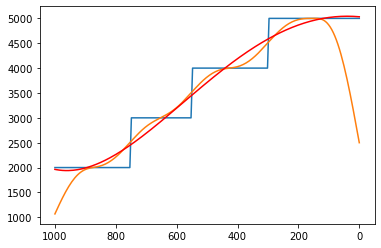

In [8]:
N = 60
weights = np.hanning(N)

smooth_vel = np.convolve(weights/weights.sum(), vel, 'same')
sm_vel_poly = np.polyfit(np.linspace(0 * dx, nx * dx, nx), vel, 4)
sm_vel_value = np.polyval(sm_vel_poly, np.linspace(0 * dx, nx * dx, nx))

plt.figure()
ax_vel_true = plt.subplot(111)
ax_vel_true.plot(np.linspace(0 * dx, nx * dx, nx), vel)
ax_vel_true.plot(np.linspace(0 * dx, nx * dx, nx), smooth_vel)
ax_vel_true.plot(np.linspace(0 * dx, nx * dx, nx), sm_vel_value, 'r')
ax_vel_true.invert_xaxis()

In [12]:
np.concatenate((np.ones(60)*5000, np.ones(50)*4000, np.ones(50)*4000))

array([5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 4000., 4000., 4000.,
       4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000.,
       4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000.,
       4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000.,
       4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000.,
       4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000.,
       4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000.,
       4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000., 4000.,
       4000., 4000.,

In [23]:
help(plt.figure())

Help on Figure in module matplotlib.figure object:

class Figure(matplotlib.artist.Artist)
 |  Figure(figsize=None, dpi=None, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, tight_layout=None, constrained_layout=None)
 |  
 |  The top level container for all the plot elements.
 |  
 |  The Figure instance supports callbacks through a *callbacks* attribute
 |  which is a `.CallbackRegistry` instance.  The events you can connect to
 |  are 'dpi_changed', and the callback will be called with ``func(fig)`` where
 |  fig is the `Figure` instance.
 |  
 |  Attributes
 |  ----------
 |  patch
 |      The `.Rectangle` instance representing the figure background patch.
 |  
 |  suppressComposite
 |      For multiple figure images, the figure will make composite images
 |      depending on the renderer option_image_nocomposite function.  If
 |      *suppressComposite* is a boolean, this will override the renderer.
 |  
 |  Method resolution order:
 |      Figure
 |

<Figure size 432x288 with 0 Axes>